In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import  confusion_matrix,classification_report,roc_auc_score,roc_curve

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.shape

(4001, 9)

In [ ]:
data['A_id'].shape

(4001,)

In [ ]:
data['A_id'].unique()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.998e+03, 3.999e+03,
             nan])

In [ ]:
data['A_id'].value_counts()

0.0       1
2671.0    1
2658.0    1
2659.0    1
2660.0    1
         ..
1338.0    1
1339.0    1
1340.0    1
1341.0    1
3999.0    1
Name: A_id, Length: 4000, dtype: int64

In [ ]:
data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
data.drop(columns=['A_id'],axis=1,inplace=True)

In [ ]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
data.loc[4000]

Size                                         NaN
Weight                                       NaN
Sweetness                                    NaN
Crunchiness                                  NaN
Juiciness                                    NaN
Ripeness                                     NaN
Acidity        Created_by_Nidula_Elgiriyewithana
Quality                                      NaN
Name: 4000, dtype: object

In [ ]:
data.drop(data.index[-1],inplace=True)

In [ ]:
# Good=1,Bad=0
data['Quality']=data['Quality'].replace('good',int(1))
data['Quality']=data['Quality'].replace('bad',int(0))


In [ ]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [ ]:
data['Quality'].value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Quality'}>, <Axes: >, <Axes: >]],
      dtype=object)

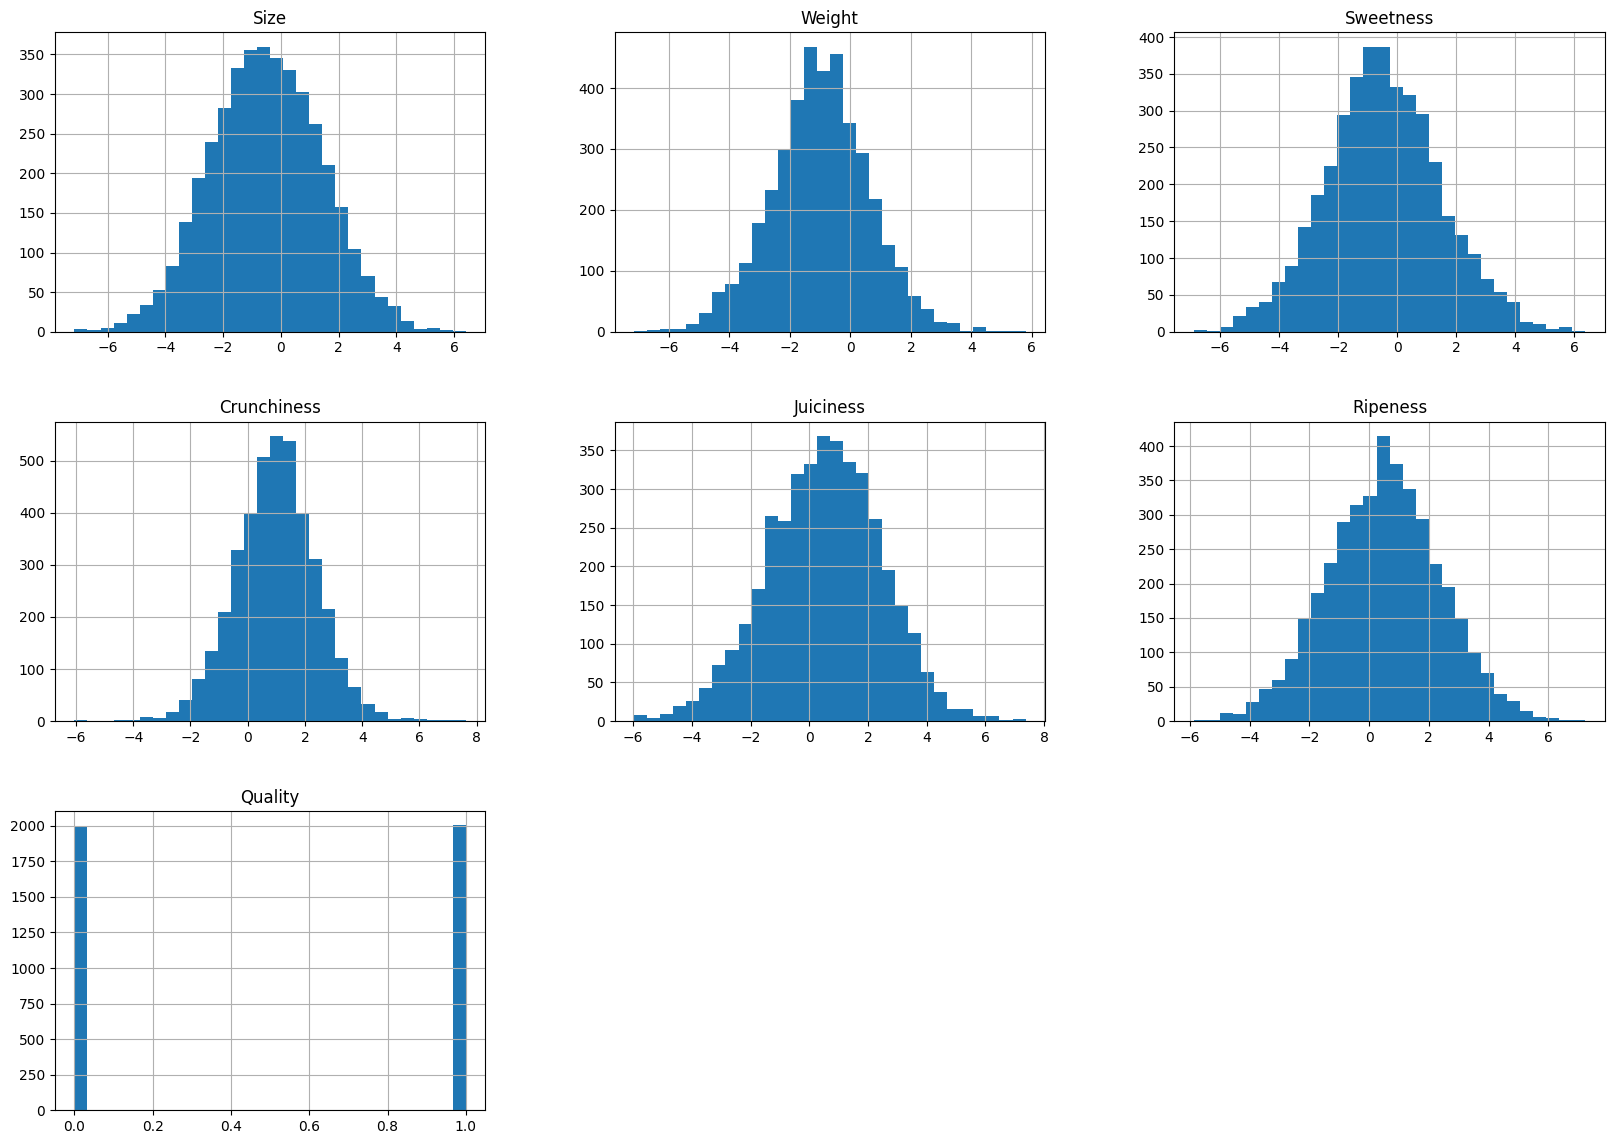

In [ ]:
data.hist(bins=30,figsize=(20,14))

In [ ]:
data['Size'].isnull().sum()

0

Text(0.5, 0, 'Ripeness')

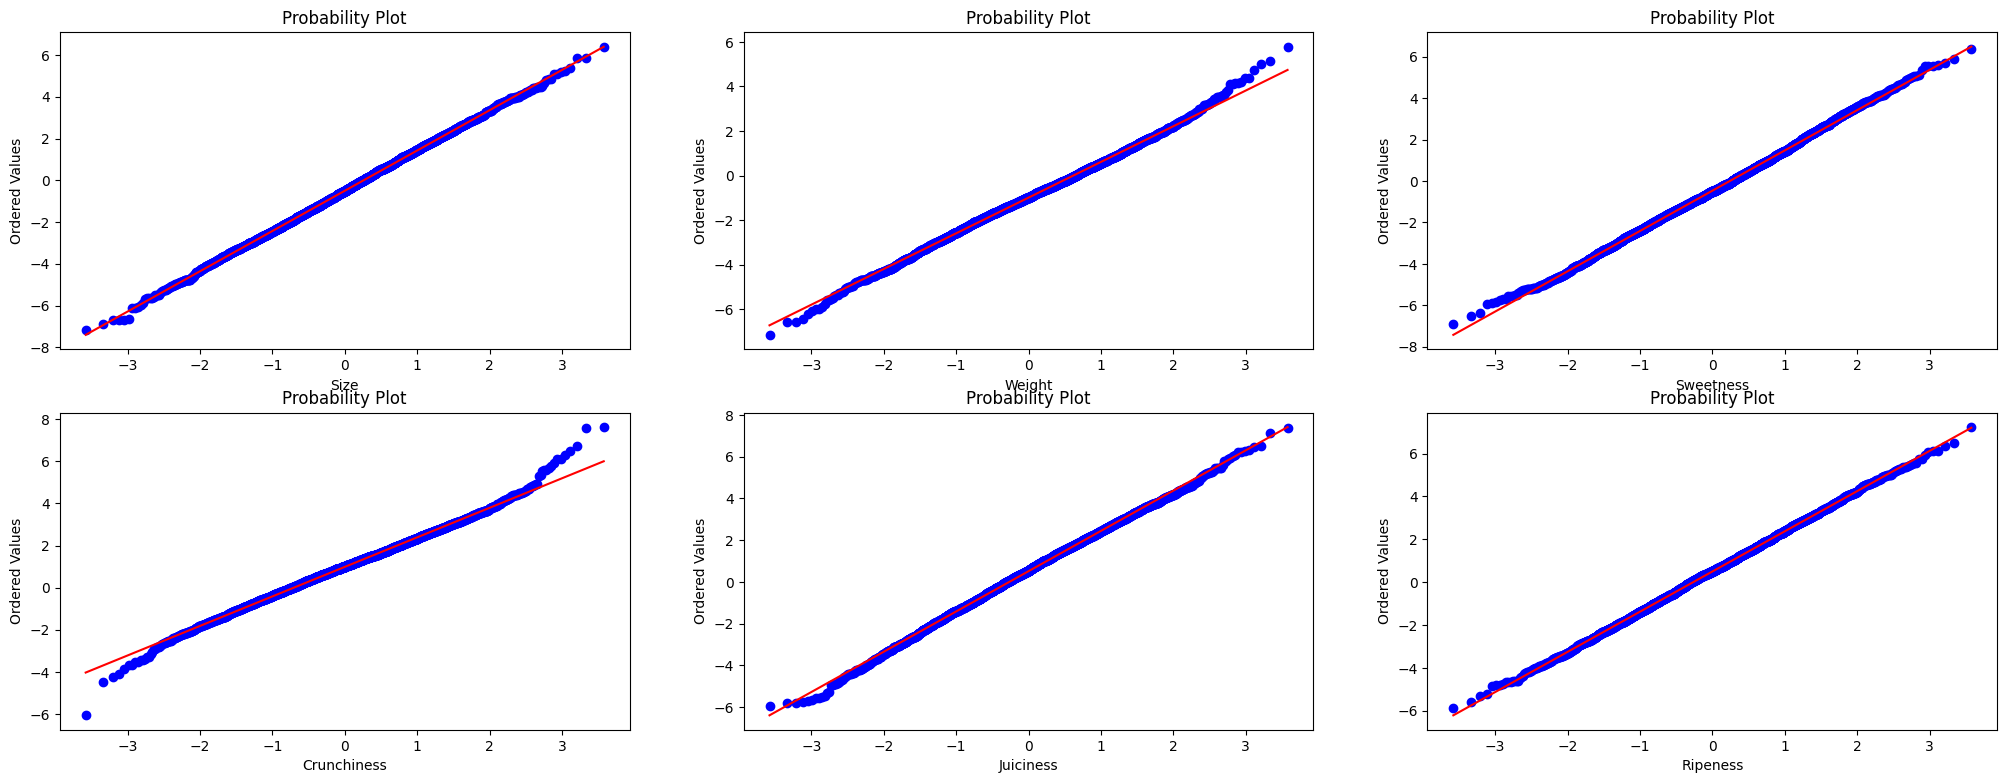

In [ ]:
plt.figure(figsize=(25,14))
ax1=plt.subplot(331)
stats.probplot(data['Size'],plot=plt)
plt.xlabel('Size')

ax2=plt.subplot(332)
stats.probplot(data['Weight'],plot=plt)
plt.xlabel('Weight')

ax3=plt.subplot(333)
stats.probplot(data['Sweetness'],plot=plt)
plt.xlabel('Sweetness')

ax4=plt.subplot(334)
stats.probplot(data['Crunchiness'],plot=plt)
plt.xlabel('Crunchiness')

ax5=plt.subplot(335)
stats.probplot(data['Juiciness'],plot=plt)
plt.xlabel('Juiciness')

ax6=plt.subplot(336)
stats.probplot(data['Ripeness'],plot=plt)
plt.xlabel('Ripeness')




**Feature Engineering**

1.   Imputation (mean,arbitray for Numerical Variables and Most Freqent imputation for Categorical Variables
2.   Treate Null values as outliers and fill with value+-3*std for normal distribution and IQR rule for skwed distribution
3.   Random Sample Imputation
4.   use KNN fot fill null values




In [ ]:
# Split data into train and test set
X_train,X_test,y_train,y_test=train_test_split(
    data.drop('Quality',axis=1),
    data['Quality'],
    test_size=0.3,
    random_state=0
)

X_train.shape,X_test.shape

((2800, 7), (1200, 7))

In [ ]:
# Capture variables with null values
null_vars=[null_var for null_var in X_train.columns if X_train[null_var].isnull().sum()>0]
null_vars

[]

In [ ]:
# Simple imputer
ct=ColumnTransformer(
    transformers=[
        ('imputer',SimpleImputer(strategy='mean'),X_train.columns)
    ],
    remainder='passthrough'

).set_output(transform='pandas')

# Fit ct on training set and Transform on traning and testing set

In [ ]:
# End Tail imputation
# Treate Null values as Outliers
# For normal distribution as we can seen in probplots all of the featuer variables are normally distributed
# Normal distribution Formula: featuers.mean() +/- featuers.std()

imputation_values=(X_train[null_vars].mean()+3*X_train[null_vars].std()).to_dict()
imputation_values


{}

In [ ]:
X_train.fillna(imputation_values,inplace=True)
X_test.fillna(imputation_values,inplace=True)

In [ ]:
#Random Sample Imputation

for var in null_vars:
  # Drop null values from training set
  # Take Sample(Number of null values present in training and testing set) from training set and testing set
  random_sample_train=(
      X_train[var].dropna().sample(X_train[var].isnull().sum(),random_state=0)
  )
  random_sample_test=(
      X_train[var].dropna().sample(X_test[var].isnull().sum(),random_state=0)
  )

  random_sample_train.index=X_train[X_train[var].isnull()].index
  random_sample_test.index=X_train[X_test[var].isnull()].index

  # Replace the NA
  X_train.loc[X_train[var].isnull(),var]=random_sample_train
  X_test.loc[X_test[var].isnull(),var]=random_sample_test



In [ ]:
knn_imputer=KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    add_indicator=False
)
# Fit on Training set
# Transform on Testing set

**Outlier Engineering**


1.   Removing Outliers
2.   Capping Outliers

Note: In this Before Removing or Capping outliers we will first check outliers

For eg. Does Size variable affect the Quality of Apple Greater Size => Good Quality Apple, Smaller The Size => Bad Quality apple

To Cap Outliers we can use pandas clip() function and define lower and upper limit



In [ ]:
def plot_box_hist(data,feature):
  fig , (ax_box,ax_hist)=plt.subplots(2)

  sns.boxplot(x=data[feature],ax=ax_box)

  sns.histplot(data=data,x=feature,ax=ax_hist)

  ax_box.set(xlabel='')
  plt.title(feature)
  plt.show()


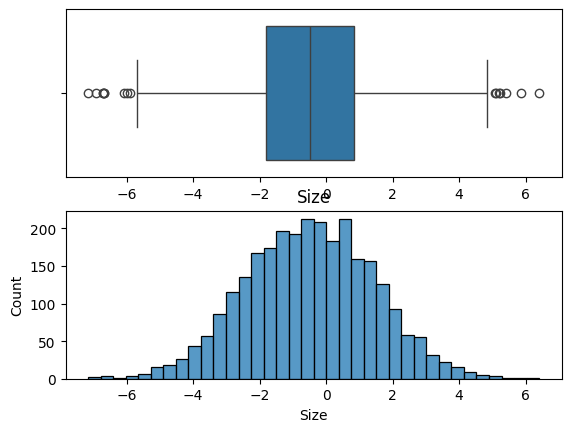

In [ ]:
plot_box_hist(X_train,'Size')

In [ ]:
# Find lower and upper limit
def find_limits(data,feature,fold):
  lower_limit=data[feature].mean() - (data[feature].std() * fold)
  upper_limit=data[feature].mean() + (data[feature].std() * fold)
  return lower_limit,upper_limit

In [ ]:
lower_limit,upper_limit=find_limits(X_train,'Size',3)

In [ ]:
#Lower and Upper limit for Size of an apple
lower_limit,upper_limit

(-6.279274057502844, 5.310019178422845)

In [ ]:
# Lower and Upper limit for Weight of an apple
lower_limit,upper_limit=find_limits(X_train,'Weight',3)
lower_limit,upper_limit

(-5.772250574783817, 3.7352386261873876)

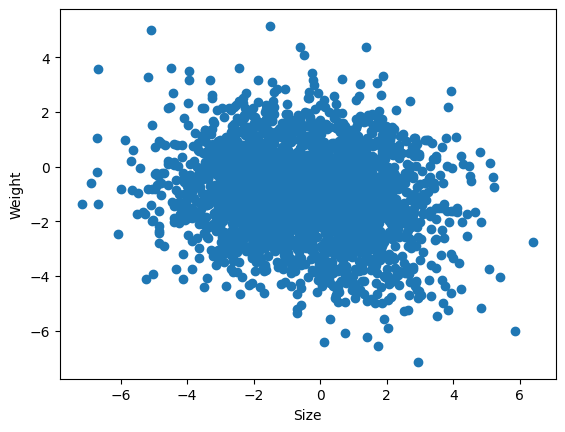

In [ ]:
plt.scatter(X_train['Size'],X_train['Weight'])
plt.xlabel('Size')
plt.ylabel('Weight')
plt.show()

**Feature Scaling**


> Standard Scaler
  
        z-score=x-mean(x)/std(x)

        sets mean at 0 and std at 1



In [ ]:
X_train.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,-0.484627,-1.018506,-0.468891,1.003816,0.512117,0.508292
std,1.931549,1.584582,1.936034,1.400307,1.925847,1.882127
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.025041,-1.714642,0.095681,-0.807431,-0.769363
50%,-0.475544,-0.988793,-0.504758,1.004988,0.555445,0.517968
75%,0.849586,0.006642,0.775928,1.907560,1.824551,1.779101
max,6.406367,5.149000,6.374916,7.619852,7.364403,7.237837


In [ ]:
scaler=StandardScaler().set_output(transform='pandas')
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
scaler.mean_

array([-0.48462744, -1.01850597, -0.46889081,  1.003816  ,  0.51211731,
        0.50829159,  0.06479533])

In [ ]:
X_train_scaled.describe().round(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00,2800.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.45,-3.87,-3.32,-5.04,-3.36,-3.39,-3.35
25%,-0.69,-0.64,-0.64,-0.65,-0.69,-0.68,-0.69
50%,0.00,0.02,-0.02,0.00,0.02,0.01,-0.03
75%,0.69,0.65,0.64,0.65,0.68,0.68,0.70
max,3.57,3.89,3.54,4.73,3.56,3.58,3.50


In [ ]:
#Logistic Regression

lr=LogisticRegression(max_iter=100,C=10,penalty='l2',solver='liblinear',random_state=0)
lr_model=lr.fit(X_train,y_train)

In [ ]:
# Prediction  on Traning Set
y_train_pred=lr.predict(X_train)
y_train_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
y_train_pred_prob=lr.predict_proba(X_train)

In [ ]:
y_train_pred_prob.shape

(2800, 2)

In [ ]:
y_train_prob=y_train_pred_prob[:,:1].reshape(2800)

In [ ]:
y_train_pred_df=pd.DataFrame({'actual':y_train,'prdicated':y_train_pred,'probability':1-y_train_prob})
y_train_pred_df

,actual,prdicated,probability
3336,1,1,0.819133
2540,1,1,0.810804
332,0,1,0.738457
852,1,1,0.604203
1036,0,0,0.089679
...,...,...,...
835,1,1,0.816196
3264,0,0,0.495913
1653,1,0,0.160372
2607,1,0,0.295523


In [ ]:
lr.score(X_train,y_train)

0.7592857142857142

In [ ]:
def draw_confussion_matrix(actual,predicted):
  cm=confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Good','Bad'],yticklabels=['Good','Bad'])
  plt.show()


In [ ]:
def draw_roc_auc(actual,probs):
  fpr,tpr,threshold=roc_curve(actual,probs,drop_intermediate=False)
  auc_score=roc_auc_score(actual,probs)
  plt.figure(figsize=(8,6))
  plt.plot(fpr,tpr,label='ROC Curve')
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])
  plt.show()

  return fpr,tpr,threshold


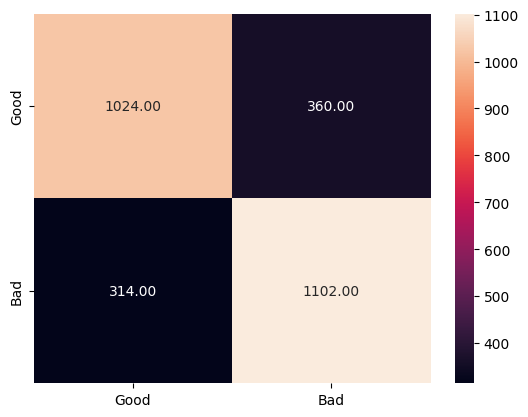

In [ ]:
draw_confussion_matrix(y_train,y_train_pred)

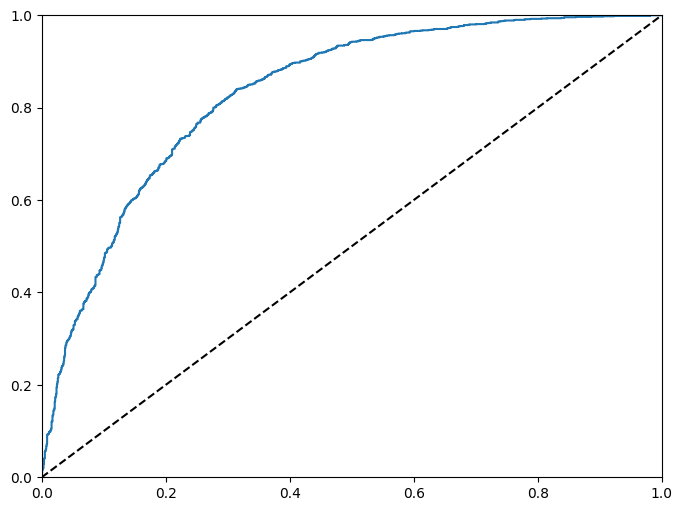

In [ ]:
fpt,tpr,threshold=draw_roc_auc(y_train,1-y_train_prob)

In [ ]:
y_test_pred=lr.predict(X_test)


In [ ]:
#y_train_prob=y_train_pred_prob[:,:1].reshape(2800)
y_test_pred_prob=lr.predict_proba(X_test)
y_test_pred_prob=y_test_pred_prob[:,:1].reshape(len(y_test_pred))
y_test_pred_prob

array([0.92828891, 0.42504085, 0.12680391, ..., 0.5148387 , 0.3580494 ,
       0.61483756])

In [ ]:
predicted_df=pd.DataFrame({'actual':y_test,'prdicted':y_test_pred,'probability':1-y_test_pred_prob})
predicted_df[(predicted_df['actual']==1) & (predicted_df['prdicted']==1)]

,actual,prdicted,probability
668,1,1,0.574959
3616,1,1,0.873196
538,1,1,0.905868
1791,1,1,0.870614
224,1,1,0.761244
...,...,...,...
2523,1,1,0.871932
2505,1,1,0.930193
53,1,1,0.909171
3584,1,1,0.865074


In [ ]:
predicted_df[(predicted_df['actual']==0) & (predicted_df['prdicted']==0)]

,actual,prdicted,probability
2230,0,0,0.071711
2363,0,0,0.485932
410,0,0,0.058126
2800,0,0,0.045262
2281,0,0,0.040743
...,...,...,...
3597,0,0,0.065174
791,0,0,0.134205
3252,0,0,0.377484
3627,0,0,0.427837


In [ ]:
lr.score(X_test,y_test)

0.7275

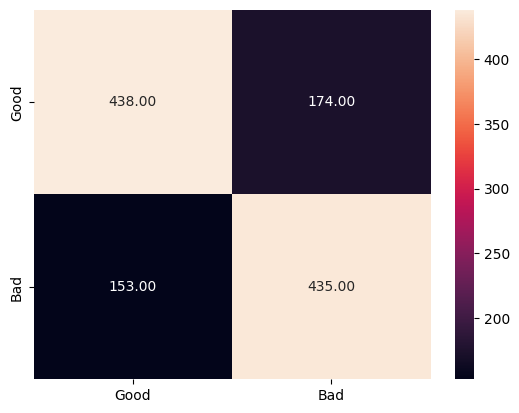

In [ ]:
draw_confussion_matrix(y_test,y_test_pred)

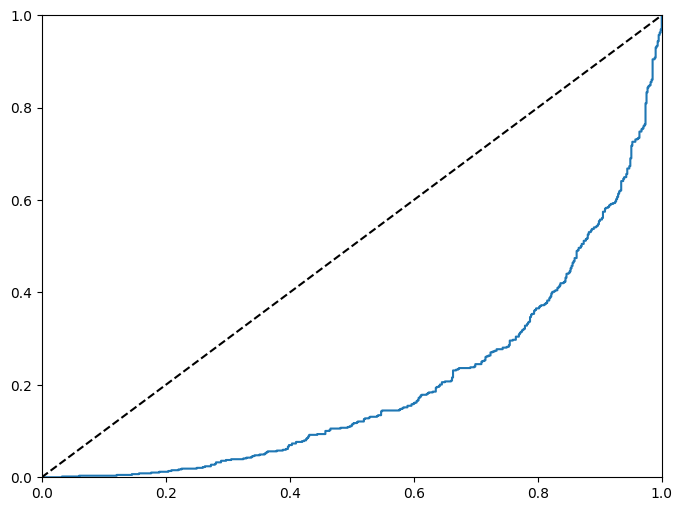

In [ ]:
fpr,tpr,threshold=draw_roc_auc(y_test,y_test_pred_prob)

In [ ]:
auc_score=roc_auc_score(y_test,y_test_pred_prob)
auc_score

0.19762071495264774

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       612
           1       0.71      0.74      0.73       588

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [ ]:
# Fit model on scaled training and testing set
lr=LogisticRegression(max_iter=100,C=1,penalty='l2',solver='liblinear',random_state=0)
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [ ]:
y_train_pred=lr.predict(X_train_scaled)

In [ ]:
lr.score(X_train_scaled,y_train)

0.7592857142857142

In [ ]:
y_test_pred=lr.predict(X_test_scaled)
lr.score(X_test_scaled,y_test)

0.7275

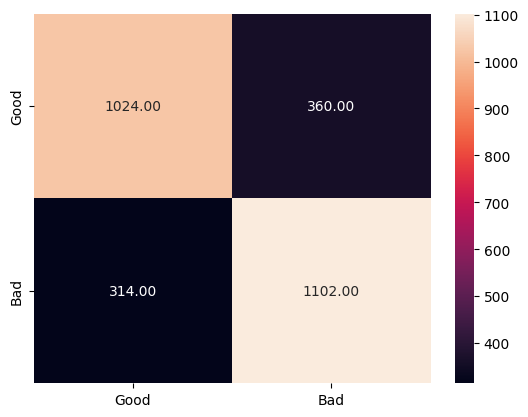

In [ ]:
draw_confussion_matrix(y_train,y_train_pred)

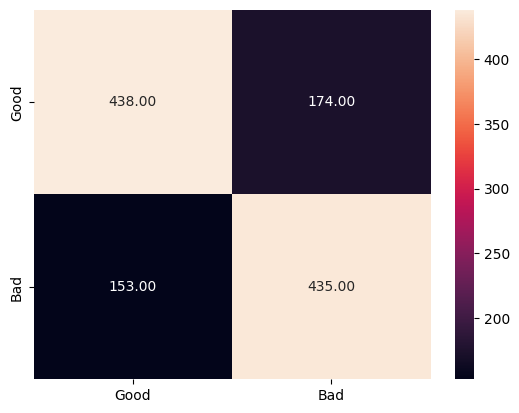

In [ ]:
draw_confussion_matrix(y_test,y_test_pred)

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       612
           1       0.71      0.74      0.73       588

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [ ]:
# Implementing Random Forest Classifier
# Tree based Algorithms not affected by scaling thats why using traning and test set without scaling
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_train_pred=rf.predict(X_train)

In [ ]:
# Score on train set
rf.score(X_train,y_train)

1.0

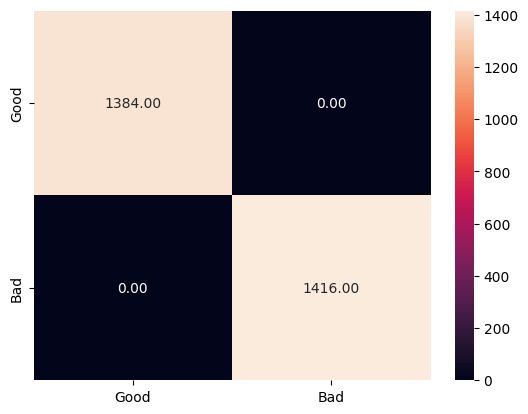

In [ ]:
draw_confussion_matrix(y_train,y_train_pred)

In [ ]:
# score in test set

y_test_pred=rf.predict(X_test)
rf.score(X_test,y_test)

0.8725

In [ ]:
y_test_pred_prob=rf.predict_proba(X_test)
y_test_pred_prob=y_test_pred_prob[:,1]

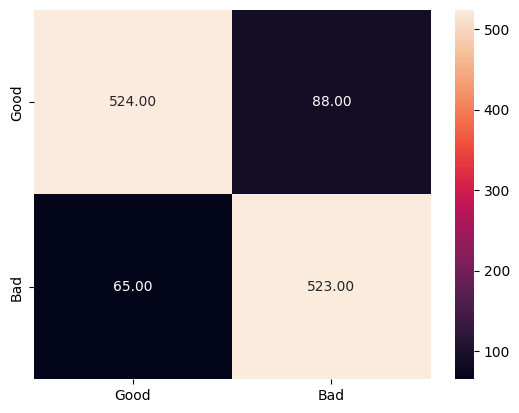

In [ ]:

draw_confussion_matrix(y_test,y_test_pred)

In [ ]:
test_predication_df=pd.DataFrame({'actual':y_test,'predicated':y_test_pred,'probability':y_test_pred_prob})
test_predication_df

,actual,predicated,probability
2230,0,0,0.09
668,1,1,0.85
3616,1,1,0.89
2363,0,0,0.28
142,0,0,0.37
...,...,...,...
3627,0,0,0.14
3217,0,1,0.97
3964,0,0,0.48
149,1,1,0.54


In [ ]:
test_predication_df[(test_predication_df['actual']==1) & (test_predication_df['predicated']==1)]

,actual,predicated,probability
668,1,1,0.85
3616,1,1,0.89
538,1,1,0.96
1791,1,1,0.84
1150,1,1,0.66
...,...,...,...
53,1,1,0.81
3775,1,1,0.69
3584,1,1,0.94
149,1,1,0.54


In [ ]:
test_predication_df[(test_predication_df['actual']==0) & (test_predication_df['predicated']==0)]

,actual,predicated,probability
2230,0,0,0.09
2363,0,0,0.28
142,0,0,0.37
410,0,0,0.09
2178,0,0,0.50
...,...,...,...
1422,0,0,0.36
791,0,0,0.19
3252,0,0,0.23
3627,0,0,0.14


In [ ]:
print(classification_report(y_true=test_predication_df['actual'],y_pred=test_predication_df['predicated']))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       612
           1       0.86      0.89      0.87       588

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



**Feature Selection**


1.   Detecting Constant Featuers
2.   Correlation - Correlation between Featuers and Target is good but Correlation among Featuers Not good for predication.
3.   Statistical Tests
     > Mutual Information for both Classfication and Regression
     > Chi-square Test For categorical variables
4.   Wrapper Methods
     > Step Forward(Select only on Feature and then add One Featuer at a time)
     > Step Backward(Select all Features and then remove one Feature at a  time)







In [ ]:
# Detecting constant featuers

sel=VarianceThreshold(threshold=0)
sel.fit(X_train_scaled)

VarianceThreshold(threshold=0)

In [ ]:
len(sel.get_support())

7

In [ ]:
# We dont have any Constant Featuers in dataset
sel.get_feature_names_out()

array(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity'], dtype=object)

In [ ]:
# Correlation Matrix
corr_mat=X_train.corr(method='pearson')
cmap=sns.diverging_palette(220,20,as_cmap=True)
corr_mat

<ipython-input-89-6437d56b6982>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=X_train.corr(method='pearson')


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
Size,1.000000,-0.159917,-0.319687,0.179541,-0.023846,-0.158652
Weight,-0.159917,1.000000,-0.156344,-0.093735,-0.091589,-0.248424
Sweetness,-0.319687,-0.156344,1.000000,-0.056425,0.094950,-0.263867
Crunchiness,0.179541,-0.093735,-0.056425,1.000000,-0.265113,-0.188363
Juiciness,-0.023846,-0.091589,0.094950,-0.265113,1.000000,-0.105315
Ripeness,-0.158652,-0.248424,-0.263867,-0.188363,-0.105315,1.000000


<Axes: >

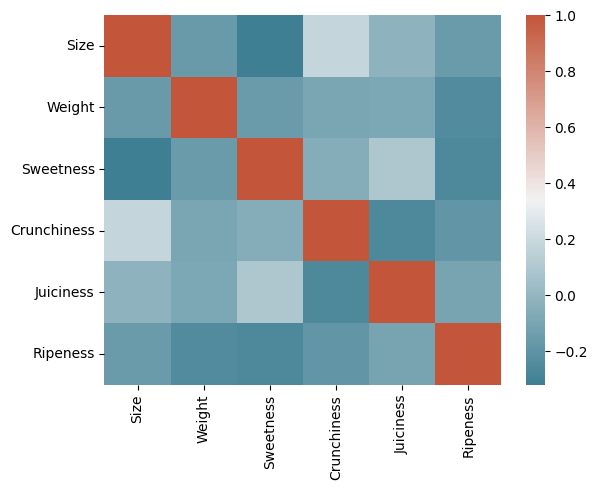

In [ ]:
# Draw a heat map using Seaborn for better understanding
sns.heatmap(corr_mat,cmap=cmap)


In [ ]:
def findCorrelatedFeatuers(dataset,thershold):
  cor_col=set()
  corr_mat=dataset.corr()
  for i in range(len(corr_mat)):
    for j in range(i):
      if (abs(corr_mat.iloc[i,j])>thershold):
        print(abs(corr_mat.iloc[i,j]),corr_mat[i],corr_mat[j])
        colname=corr_mat.columns[j]
        cor_col.add(colname)
  return cor_col

In [ ]:
correlatedFeatuers=findCorrelatedFeatuers(X_train,0.8)
correlatedFeatuers

<ipython-input-101-a7122a247cc8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=dataset.corr()


set()

In [ ]:
#Could not find any correlated featuers
len(correlatedFeatuers)

0

In [ ]:
mutual_info=mutual_info_classif(X_train,y_train)

Text(0, 0.5, 'Mutual Information')

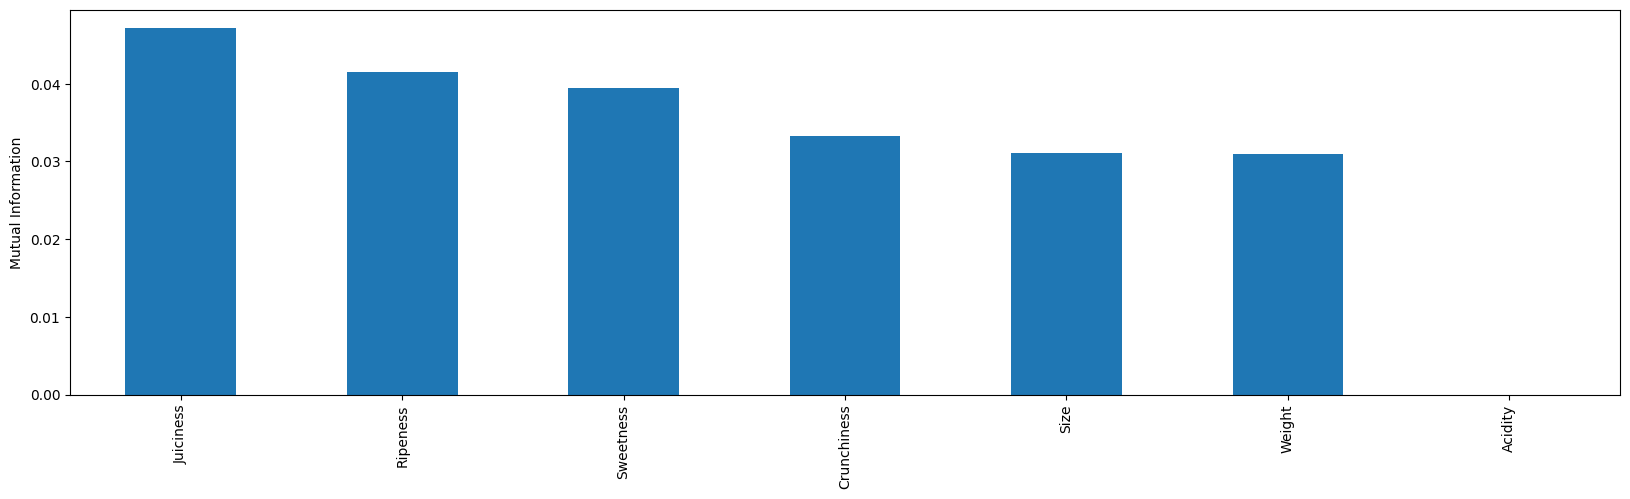

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('Mutual Information')



*   We can select Top-k featuers using **SelectKBest**
*   We can select Top percentile using **SelectPercentile**

Since There are very few featuers No need to select featuers



In [ ]:
# select k featuers using selectKBest
# fit select k featuers on train set and transform on train and test set
mi_sel_featuers=SelectKBest(mutual_info_classif,k=6).fit(X_train,y_train)
mi_sel_featuers

SelectKBest(k=6, score_func=<function mutual_info_classif at 0x79bcfc2ed2d0>)

In [ ]:
mi_sel_featuers.get_feature_names_out() # Top Six Featuers are selected

array(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness'], dtype=object)

In [ ]:
# Step Forward Feature Selection using linear Regression model
step_forward_selection=SFS(
    estimator=lr,
    n_features_to_select=6,
    direction='forward',
    scoring='roc_auc',
    cv=2
)
selected_featuers_sfs=step_forward_selection.fit(X_train_scaled,y_train)

In [ ]:
#Six Featuers are selected DOES NOT include Crunchiness
selected_featuers_sfs.get_feature_names_out()

array(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity'],
      dtype=object)

In [ ]:
# Step Forward Feature Selection using RandomForestRegression
step_forward_selection=SFS(
    estimator=rf,
    n_features_to_select=6,
    direction='forward',
    scoring='roc_auc',
    cv=2
)
selected_featuers_sfs_rf=step_forward_selection.fit(X_train,y_train)

In [ ]:
# For random forest Six Featuers are selected DOES NOT include Weight May be because of More the weight bigger the apple
selected_featuers_sfs_rf=selected_featuers_sfs_rf.get_feature_names_out()

In [ ]:
def compare_randomForest(X_train,X_test,y_train,y_test):

  rf=RandomForestClassifier(n_estimators=100,random_state=0)
  rf.fit(X_train,y_train)

  print('Train set')
  pred=rf.predict_proba(X_train)
  print('Random Forest roc:auc{}'.format(roc_auc_score(y_train,pred[:,1])))

  print('Test set')
  pred=rf.predict_proba(X_test)
  pred_class=rf.predict(X_test)
  print('Random Forest roc:auc{}'.format(roc_auc_score(y_test,pred[:,1])))

  print(classification_report(y_test,pred_class))



In [ ]:
compare_randomForest(X_train[selected_featuers_sfs_rf],X_test[selected_featuers_sfs_rf],y_train,y_test)

Train set
Random Forest roc:auc1.0
Test set
Random Forest roc:auc0.9290285558667911
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       612
           1       0.84      0.87      0.85       588

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.86      0.85      0.85      1200



In [ ]:
compare_randomForest(X_train,X_test,y_train,y_test)

Train set
Random Forest roc:auc1.0
Test set
Random Forest roc:auc0.9435663154150549
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       612
           1       0.86      0.89      0.87       588

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



In [ ]:
def compare_logisticRegression(X_train,X_test,y_train,y_test):
  X_train=X_train.drop('Acidity',axis=1)
  X_test=X_test.drop('Acidity',axis=1)
  print(X_train.shape)
  lr=LogisticRegression(max_iter=100,C=10,penalty='l2',solver='liblinear',random_state=0)
  lr.fit(X_train,y_train)

  print('Train set')
  train_predict=lr.predict(X_train)
  predict_prob=lr.predict_proba(X_train)
  print('Logistic Regression roc-auc {}'.format(roc_auc_score(y_train,predict_prob[:,1])))

  print('Test set')
  test_predict=lr.predict(X_test)
  predict_prob=lr.predict_proba(X_test)
  print('Logisitic Regression roc-auc: {}'.format(roc_auc_score(y_test,predict_prob[:,1])))

  print(classification_report(y_test,test_predict))

In [ ]:
compare_logisticRegression(X_train_scaled,
                           X_test_scaled,
                           y_train,
                           y_test)

(2800, 6)
Train set
Logistic Regression roc-auc 0.8131087529799811
Test set
Logisitic Regression roc-auc: 0.7725562447201103
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       612
           1       0.68      0.74      0.71       588

    accuracy                           0.70      1200
   macro avg       0.71      0.71      0.70      1200
weighted avg       0.71      0.70      0.70      1200



In [ ]:
def compare_logisticRegression_without_featureSelection(X_train,X_test,y_train,y_test):
  lr=LogisticRegression(max_iter=100,C=10,penalty='l2',solver='liblinear',random_state=0)
  lr.fit(X_train,y_train)

  print('Train set')
  train_predict=lr.predict(X_train)
  predict_prob=lr.predict_proba(X_train)
  print('Logistic Regression roc-auc {}'.format(roc_auc_score(y_train,predict_prob[:,1])))

  print('Test set')
  test_predict=lr.predict(X_test)
  predict_prob=lr.predict_proba(X_test)
  print('Logisitic Regression roc-auc: {}'.format(roc_auc_score(y_test,predict_prob[:,1])))

  print(classification_report(y_test,test_predict))

In [ ]:
compare_logisticRegression_without_featureSelection(X_train_scaled,X_test_scaled,y_train,y_test)

Train set
Logistic Regression roc-auc 0.8326459986610495
Test set
Logisitic Regression roc-auc: 0.8023987372726868
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       612
           1       0.71      0.74      0.73       588

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



**Hyperparameter Optimization**


In [ ]:
# Cross validation for logistic regression
lr=LogisticRegression(max_iter=100,C=1,solver='liblinear',random_state=3)
kf=KFold(n_splits=5,shuffle=True,random_state=3)
clf=cross_validate(
    lr,
    X_train_scaled,
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=kf
)

In [ ]:
clf['test_score']

array([0.7375    , 0.77142857, 0.78035714, 0.7625    , 0.72857143])

In [ ]:
clf['train_score']

array([0.75803571, 0.75669643, 0.75357143, 0.75491071, 0.76428571])

In [ ]:
print('Mean train score:',np.mean(clf['train_score']),'+/-',np.std(clf['train_score']))
print('Mean test score:',np.mean(clf['test_score']),'+/-',np.std(clf['test_score']))

Mean train score: 0.7575000000000001 +/- 0.003717975502438729
Mean test score: 0.7560714285714287 +/- 0.019839920589044505


In [ ]:
# Cross validation for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
clf=cross_validate(rf,X_train,y_train,scoring='accuracy',return_train_score=True,cv=kf)


In [ ]:
clf['train_score']

array([1., 1., 1., 1., 1.])

In [ ]:
clf['test_score']

array([0.89642857, 0.88035714, 0.88571429, 0.88571429, 0.86607143])

In [ ]:
print('Mean train score:',np.mean(clf['train_score']),'+/-',np.std(clf['train_score']))
print('Mean test score:',round(np.mean(clf['test_score']),2),'+/-',round(np.std(clf['test_score']),2))

Mean train score: 1.0 +/- 0.0
Mean test score: 0.88 +/- 0.01


In [ ]:
# Grid Search and cross validation

lr=LogisticRegression(max_iter=1000,C=1,solver='liblinear',penalty='l2', random_state=3)

param_grid=dict(
    C=[0.1,1,10],
    penalty=['l1','l2'],
  )

kf=KFold(n_splits=5,random_state=2,shuffle=True)

clf=GridSearchCV(lr,param_grid,scoring='accuracy',cv=kf,refit=True)

search=clf.fit(X_train_scaled,y_train)

In [ ]:
search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.757143,0.021068
1,"{'C': 0.1, 'penalty': 'l2'}",0.757857,0.021476
2,"{'C': 1, 'penalty': 'l1'}",0.757143,0.018420
3,"{'C': 1, 'penalty': 'l2'}",0.757857,0.019153
4,"{'C': 10, 'penalty': 'l1'}",0.757857,0.018302
5,"{'C': 10, 'penalty': 'l2'}",0.757857,0.018302


In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
param_grid=dict(
    n_estimators=[100,1000,10000]
)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
clf=GridSearchCV(rf,param_grid,cv=kf,scoring='accuracy')
search=clf.fit(X_train,y_train)

In [ ]:
search.best_params_

{'n_estimators': 1000}

In [ ]:
search.best_score_

0.8882142857142856

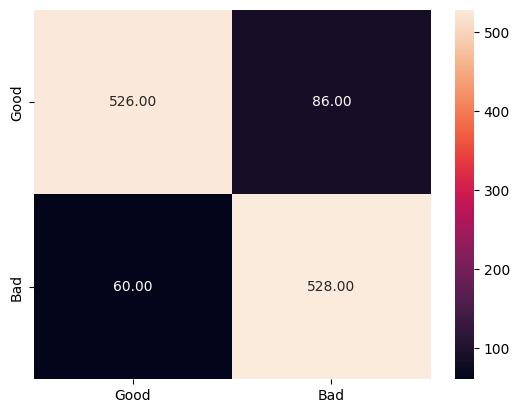

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       612
           1       0.86      0.90      0.88       588

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200



In [ ]:
rf=RandomForestClassifier(n_estimators=1000,random_state=0)
rf.fit(X_train,y_train)
train_pred=rf.predict(X_train)
train_pred_prob=rf.predict_proba(X_train)

test_pred=rf.predict(X_test)
test_pred_prob=rf.predict_proba(X_test)

draw_confussion_matrix(actual=y_test,predicted=test_pred)
print(classification_report(y_true=y_test,y_pred=test_pred))

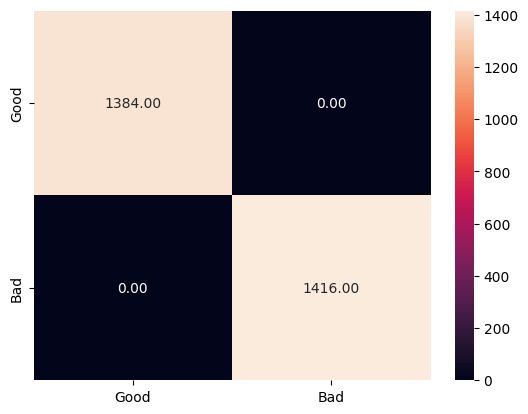

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1384
           1       1.00      1.00      1.00      1416

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



In [ ]:
draw_confussion_matrix(actual=y_train,predicted=train_pred)
print(classification_report(y_train,train_pred))